# Import the training and testing data

Download data.tar.gz from https://tiny.cc/ + the full manuscript ID for part 1 (case sensitive), and untar and ungzip this into the directory "MCS/mcs" and make sure the output folder is "data" and it has a folder named "training_data". Examine the code to see the proper location if you are getting an error (i.e., "../data/training_data/")

In [1]:
import pickle
import pandas as pd
from functools import partial

filename = "../data/training_data/official_test_train_5_class_013018.pkl"

X_train, X_test, y_train, y_test = pickle.load(open(filename, "rb"))

df = pd.concat([X_train, X_test])
df = df.apply(partial(pd.to_numeric, errors='ignore'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3659 entries, 1966 to 610
Data columns (total 24 columns):
index                          3659 non-null int64
filename                       3659 non-null object
mean_intensity                 3659 non-null float64
solidity                       3659 non-null float64
intensity_variance             3659 non-null float64
intense_convection_ratio       3659 non-null float64
convection_stratiform_ratio    3659 non-null float64
area                           3659 non-null int64
convection_area                3659 non-null int64
max_intensity                  3659 non-null int64
minor_axis_length              3659 non-null float64
intense_area                   3659 non-null int64
eccentricity                   3659 non-null float64
convex_area                    3659 non-null int64
intense_stratiform_ratio       3659 non-null float64
major_axis_length              3659 non-null float64
datetime                       3659 non-null int64
label

In [2]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

X_train = df[df.index.year>=2006]
y_train = X_train.label.values

X_test = df[df.index.year<2006]
y_test = X_test.label.values

# These vectors are associated with the following features...

In [3]:
feature_list = ['area', 'convex_area', 'eccentricity', 
                'intense_area', 'convection_area',
                'convection_stratiform_ratio', 'intense_stratiform_ratio',
                'intense_convection_ratio', 'mean_intensity', 'max_intensity',
                'intensity_variance', 'major_axis_length', 'minor_axis_length',
                'solidity']

# ... and the following labels

In [4]:
labels = ['MCS', 'UCC', 'TROP', 'SYNP', 'CLUT']

In [5]:
df.label.values

array([1, 0, 3, ..., 1, 3, 0], dtype=int64)

In [6]:
df['label_name'] = [labels[x] for x in df.label.values]

df.head(5)

,index,filename,mean_intensity,solidity,intensity_variance,intense_convection_ratio,convection_stratiform_ratio,area,convection_area,max_intensity,...,intense_stratiform_ratio,major_axis_length,label,minor_major_ratio,xmax,xmin,ymax,ymin,label1,label_name
datetime,,,,,,,,,,,,,,,,,,,,,
2003-08-08 00:00:00,1966,extracted/non_mcs_files/non_mcs_BREF_030808_00...,34.501445,0.610768,123.848264,0.378378,0.427746,2768,1184,60,...,0.161850,148.427694,1,0.214345,2481,2421,1074,1032,0,UCC
2004-06-03 00:00:00,570,extracted/mcs_files/mcs_BREF_040603_0000_000.png,32.766836,0.424754,97.369261,0.299957,0.309585,210204,65076,70,...,0.092862,1375.858518,0,0.302458,2053,1403,1123,879,1,MCS
2009-06-29 09:15:00,3387,extracted/synoptic_files/synoptic_BREF_090629_...,24.711597,0.159800,25.975323,0.000000,0.000000,39112,488,45,...,0.000000,772.283050,3,0.390535,2520,2084,507,294,0,SYNP
2008-08-13 04:00:00,343,extracted/clutter_files/clutter_BREF_080813_04...,20.506608,0.735223,2.606785,0.000000,0.000000,3632,0,30,...,0.000000,87.072821,4,0.748341,1910,1866,1162,1127,0,CLUT
2010-06-01 18:00:00,3407,extracted/synoptic_files/synoptic_BREF_100601_...,25.334432,0.514085,26.203776,0.021197,0.020498,156504,3208,50,...,0.000434,798.110391,3,0.423256,3422,2969,542,285,0,SYNP


# Examine feature value distribution for training data

C:\Users\ahaberlie\Anaconda3\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


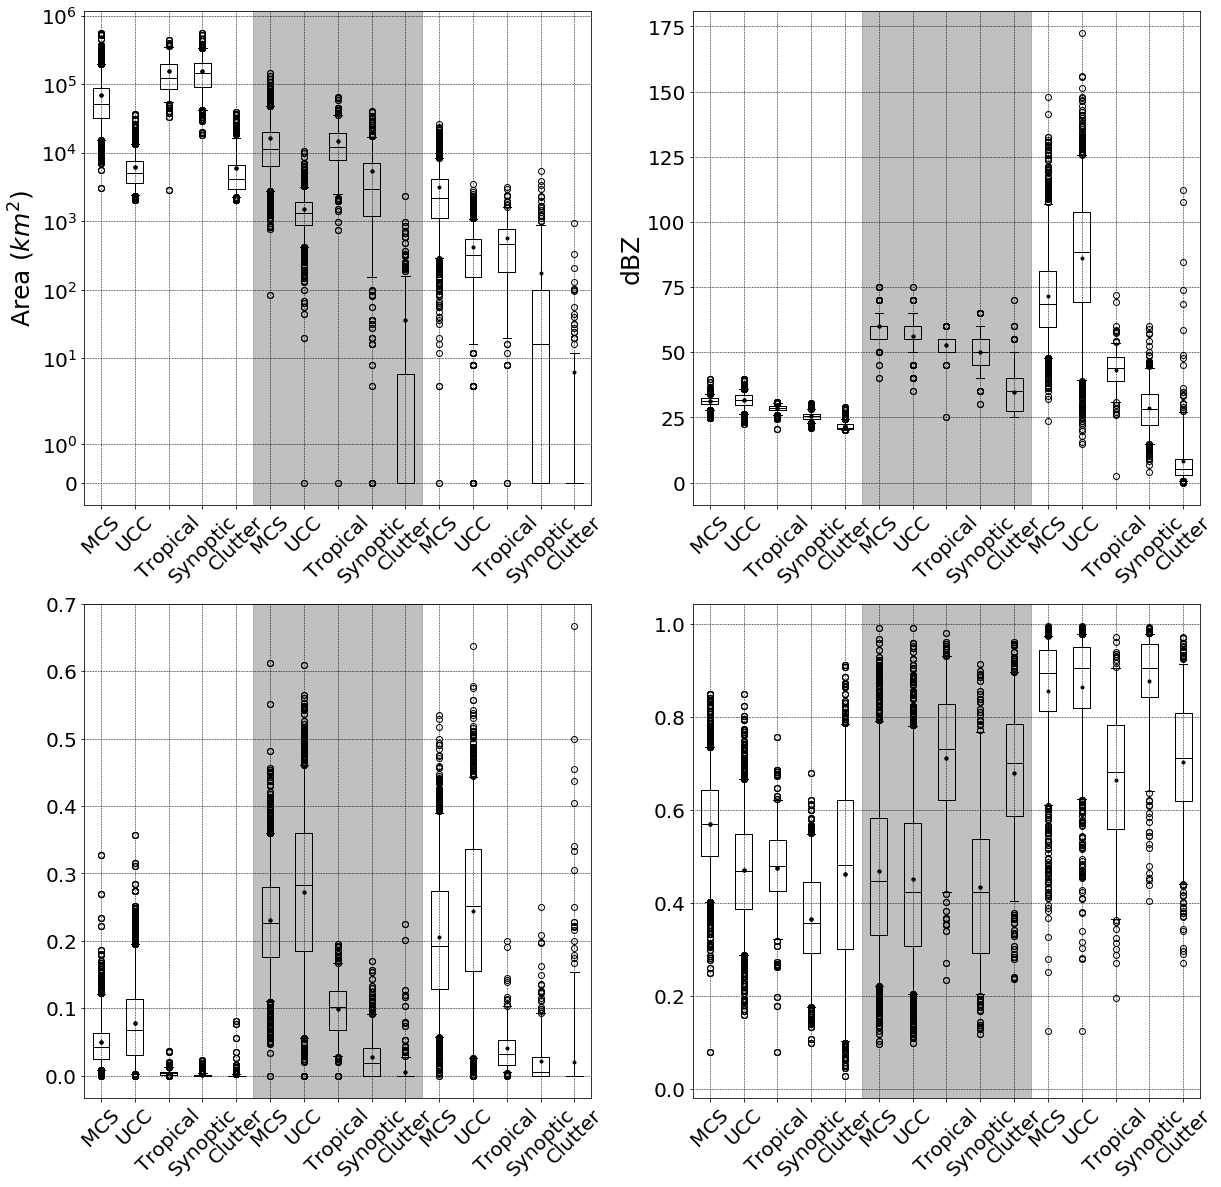

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 20, 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

labs = ['MCS', 'UCC', 'Tropical', 'Synoptic', 'Clutter']

intensities = ['mean_intensity', 'max_intensity', 'intensity_variance']
ratios = ['intense_stratiform_ratio', 'convection_stratiform_ratio', 'intense_convection_ratio']
shapes = ['solidity', 'minor_major_ratio', 'eccentricity']
areas = ['area', 'convection_area', 'intense_area']

meanpointprops = dict(marker='.', markeredgecolor='black',
                      markerfacecolor='black')

for pnum, (var_group, group_name) in enumerate(zip([areas, intensities, ratios, shapes], 
                                                   ['area', 'int', 'rat', 'shp'])):

    d = {'var':[], 'label':[], 'val':[]}

    for var in var_group:
    
        grouped = df.groupby('label')

        for gid, group in grouped:

            d['var'].append(var)
            d['label'].append(labs[gid])
            d['val'].append(group[var].values.astype(float))

        dists = pd.DataFrame.from_dict(d)

        ax = plt.subplot(2, 2, pnum+1)

        bplot = ax.boxplot(dists['val'].values, whis=[5, 95], showmeans=True, meanprops=meanpointprops)

        plt.setp(bplot['medians'], color='black')

        [item.set_color('black') for item in bplot['means']] 

        ax.set_xticklabels(dists['label'].values, rotation=45)

        ax.axvspan(5.5, 10.5, color='grey', alpha=.2)

        ax.grid(True)

        ticklines = ax.get_xticklines() + ax.get_yticklines()
        gridlines = ax.get_xgridlines() + ax.get_ygridlines()
        ticklabels = ax.get_xticklabels() + ax.get_yticklabels()


        for line in ticklines:
            line.set_linewidth(.5)

        for line in gridlines:
            line.set_linestyle('--')
            line.set_color('k')
            line.set_linewidth(.5)

        if group_name == 'int':

            ax.set_ylabel('dBZ', fontsize=25)

        elif group_name == 'area':

            ax.set_ylabel("Area (" + r'$km^2$' + ")", fontsize=25)
            ax.set_yscale('symlog')

# Examine feature correlation  

Text(0.5,0,'Area ($km^2$)')

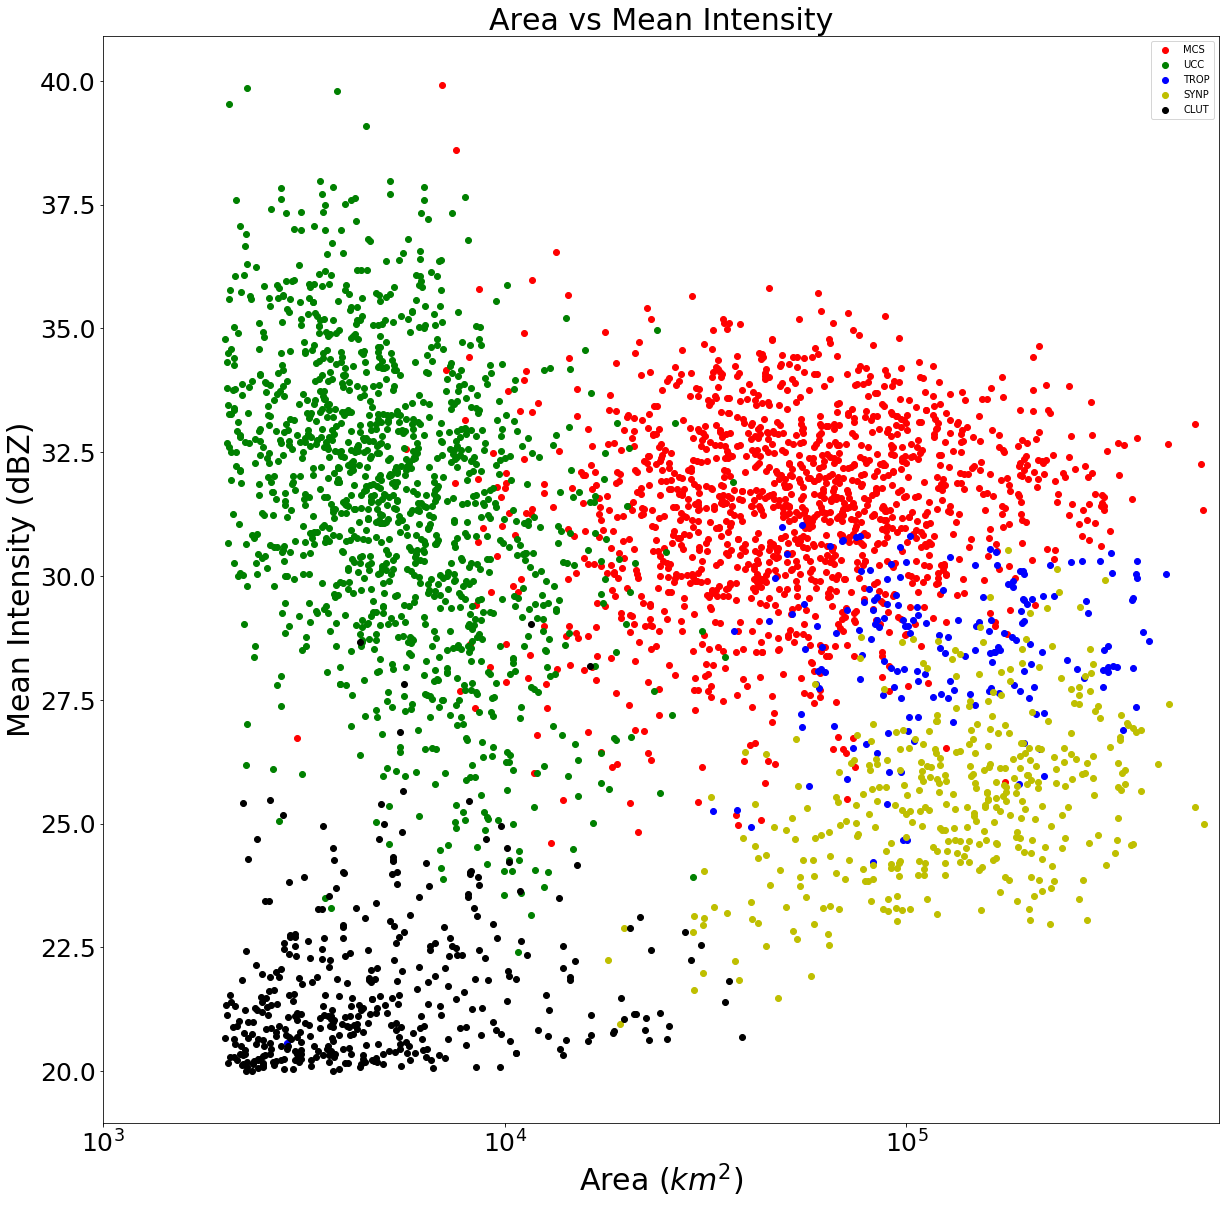

In [8]:
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 25

for color, label in zip(['r', 'g', 'b', 'y', 'k'], labels):
    t_df = df[df.label_name==label]
    plt.scatter(t_df.area, t_df.mean_intensity, c=color, label=label)


plt.xscale('symlog')
plt.legend()
plt.xlim(1000, 600000)
plt.title("Area vs Mean Intensity", fontsize=30)
plt.ylabel("Mean Intensity (dBZ)", fontsize=30)
plt.xlabel("Area (" + r'$km^2$' + ")", fontsize=30)

C:\Users\ahaberlie\Anaconda3\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


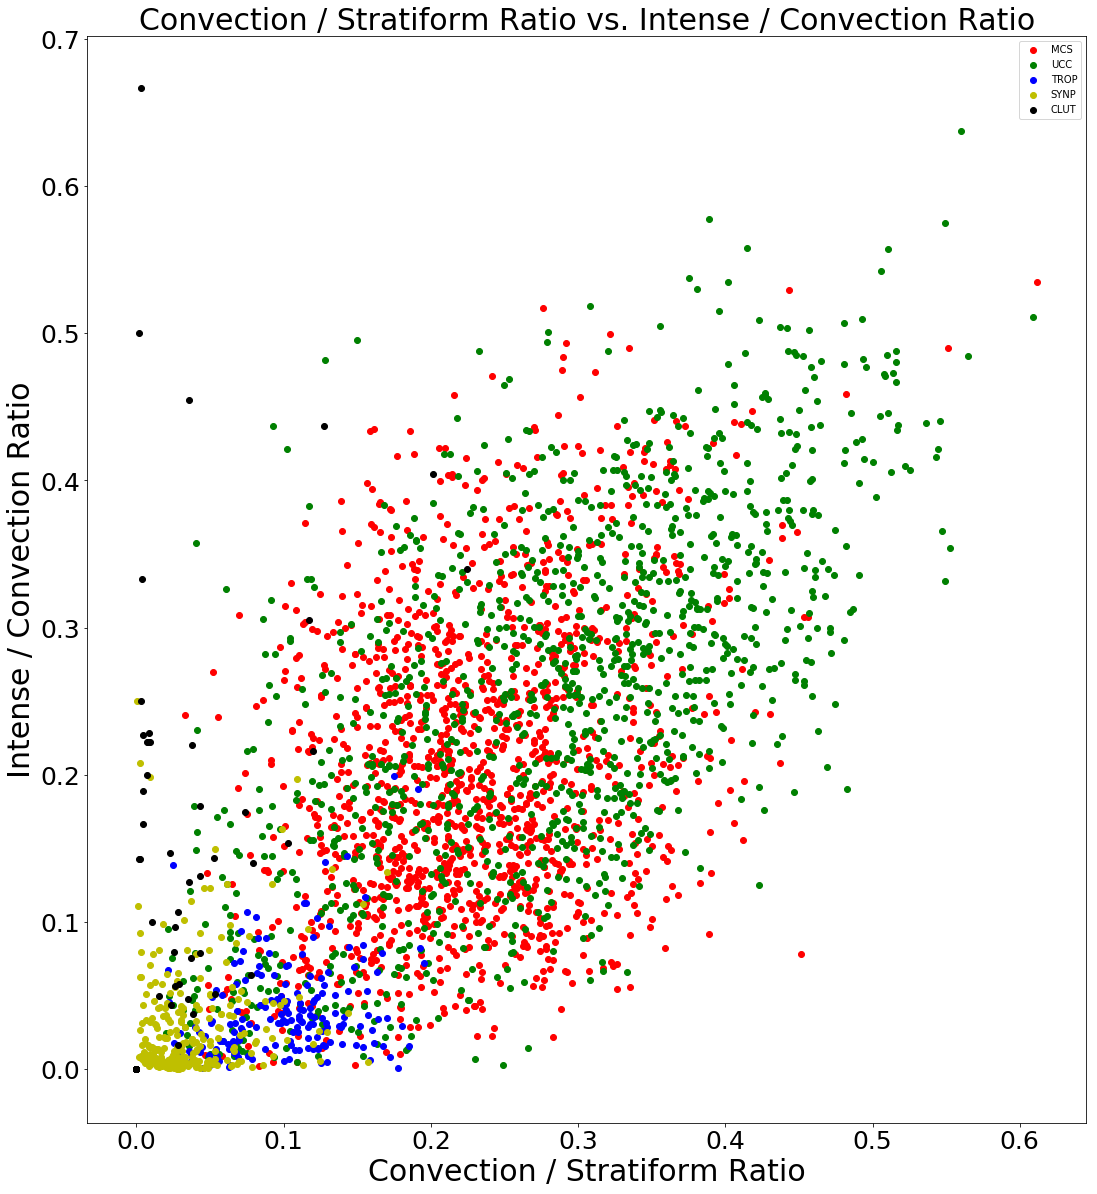

In [9]:
for color, label in zip(['r', 'g', 'b', 'y', 'k'], labels):
    t_df = df[df.label_name==label]
    plt.scatter(t_df.convection_stratiform_ratio, t_df.intense_convection_ratio, c=color, label=label)


plt.legend()
plt.ylabel("Intense / Convection Ratio", fontsize=30)
plt.xlabel("Convection / Stratiform Ratio", fontsize=30)

plt.title("Convection / Stratiform Ratio vs. Intense / Convection Ratio", fontsize=30)

plt.axes().set_aspect('equal')

# Read in "best" classifiers and build ensemble classifier

# Examine performance on testing data

In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import numpy as np

rf_clf = pickle.load(open("../data/classifiers/best_rfc_020618.pkl", 'rb'))
gb_clf = pickle.load(open("../data/classifiers/best_gbc_020618.pkl", 'rb'))
#xb_clf = pickle.load(open("../data/classifiers/best_xgbc_092717.pkl", 'rb'))

#add , ('xgb', xb_clf) if on linux
vclf = VotingClassifier([('rf', rf_clf), ('gb', gb_clf)], voting='soft')

vclf.fit(X_train[feature_list].values, y_train)

predicted = vclf.predict(X_test[feature_list].values)
expected = y_test

print("Classification report for classifier %s:\n%s\n"
      % (vclf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier VotingClassifier(estimators=[('rf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_...timators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))],
         n_jobs=1, voting='soft', weights=None):
             precision    recall  f1-score   support

          0       0.88      0.93      0.91       578
          1       0.93      0.86      0.90       666
          2       0.85      0.64      0.73        90
          3       0.88      0.93      0.91       159
          4       0.77      0.94      0.85       121

avg / total       0.89      0.89      0.89      1614


Confusion matrix:
[[538  37   3   0   0]
 [ 57 576   0   1  32]
 [ 13   0  58  19   0]
 [  2   0   7 148   2]
 [  0  

# Read in best binary classifiers and build ensemble classifier

In [11]:
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['figure.figsize'] = 20, 20

y_train1 = 1*(y_train==0)
y_test1 = 1*(y_test==0)

rfc = pickle.load(open("../data/classifiers/best_rfc_binary_020618.pkl", 'rb'))
gbc = pickle.load(open("../data/classifiers/best_gbc_binary_020618.pkl", 'rb'))
#xb_clf = pickle.load(open("../classifiers/best_xgbc_binary_092717.pkl", 'rb'))

vclf = VotingClassifier([('rf', rf_clf), ('gb', gb_clf)], voting='soft')

vclf.fit(X_train[feature_list].values, y_train1)

predicted = vclf.predict(X_test[feature_list].values)
expected = y_test1

print("Classification report for classifier %s:\n%s\n"
      % (vclf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier VotingClassifier(estimators=[('rf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_...timators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))],
         n_jobs=1, voting='soft', weights=None):
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1036
          1       0.93      0.91      0.92       578

avg / total       0.94      0.94      0.94      1614


Confusion matrix:
[[999  37]
 [ 53 525]]


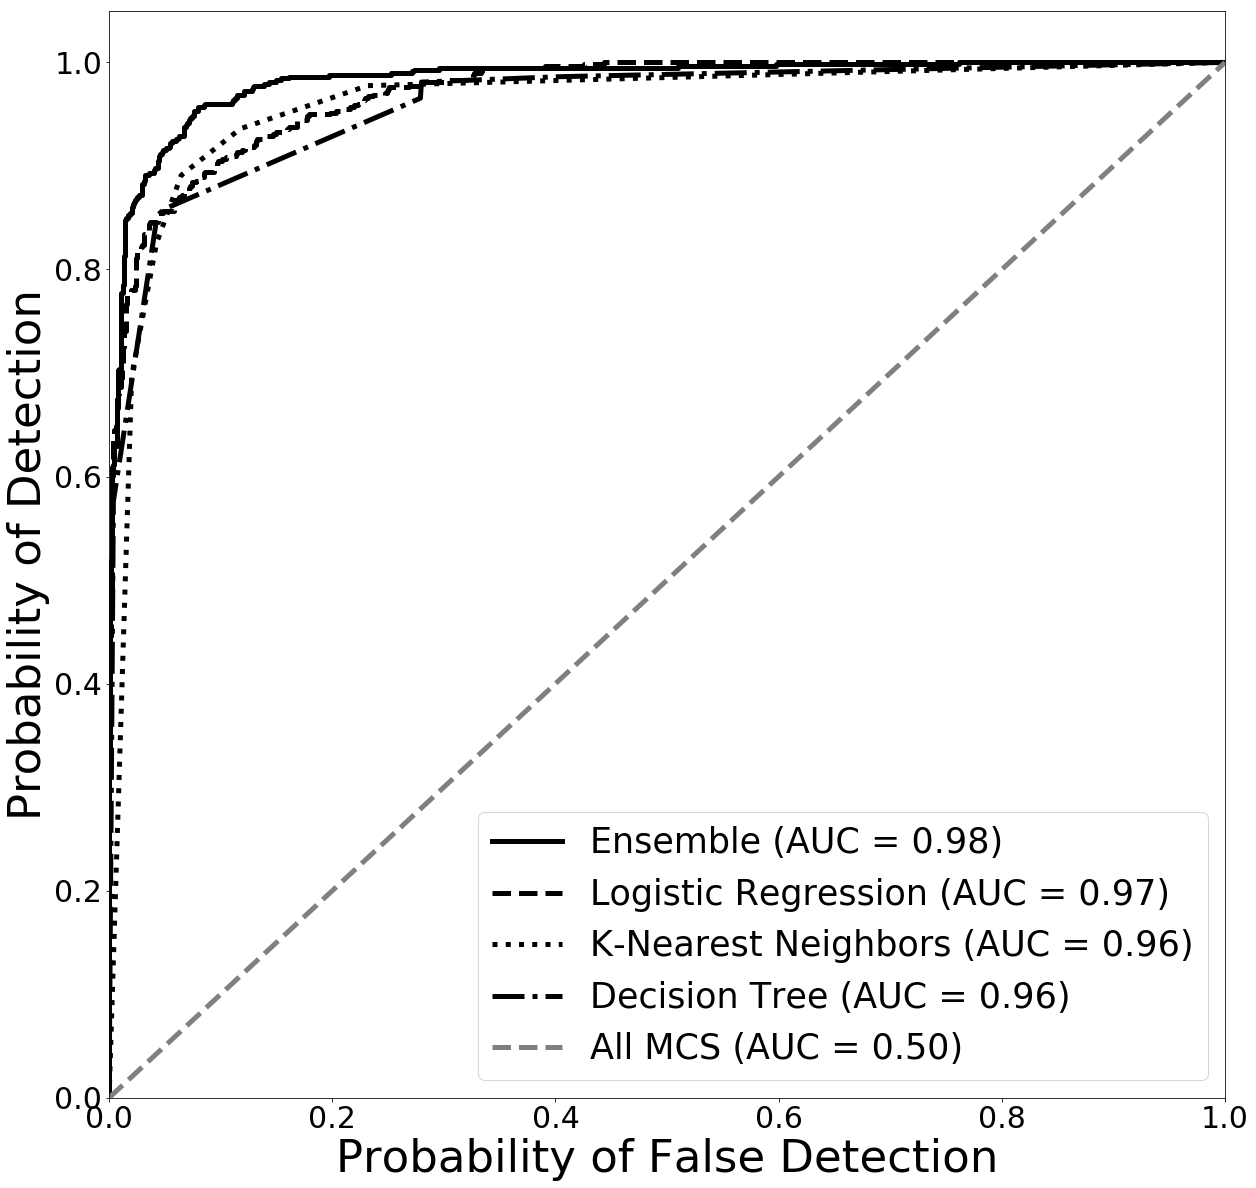

In [12]:
dt_clf = tree.DecisionTreeClassifier(max_depth=3)
kn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()

linetype = ['-', '--', ':', '-.']

vclf = VotingClassifier([('rf', rfc), ('gb', gbc)], voting='soft')

classifier_list = [vclf, lr_clf, kn_clf, dt_clf]
name_list = ['Ensemble', 'Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree']

y_train1 = 1*(y_train==0)
y_test1 = 1*(y_test==0)

for l, (clf, lab) in enumerate(zip(classifier_list, name_list)):

    clf.fit(X_train[feature_list[:-1]].values, y_train1)

    preds = clf.predict_proba(X_test[feature_list[:-1]].values)[:,1]
        
    fpr, tpr, _ = metrics.roc_curve(y_test1, preds)
    
    plt.plot(fpr, tpr, label=lab + ' (AUC = %0.2f)' % metrics.auc(fpr, tpr), lw=5, color='k', linestyle=linetype[l])
    

plt.plot([0, 1], [0, 1], color='grey', lw=5, linestyle='--', label='All MCS (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Probability of False Detection', fontsize=45)
plt.ylabel('Probability of Detection', fontsize=45)
plt.legend(loc="lower right", prop={'size': 35})
plt.show()

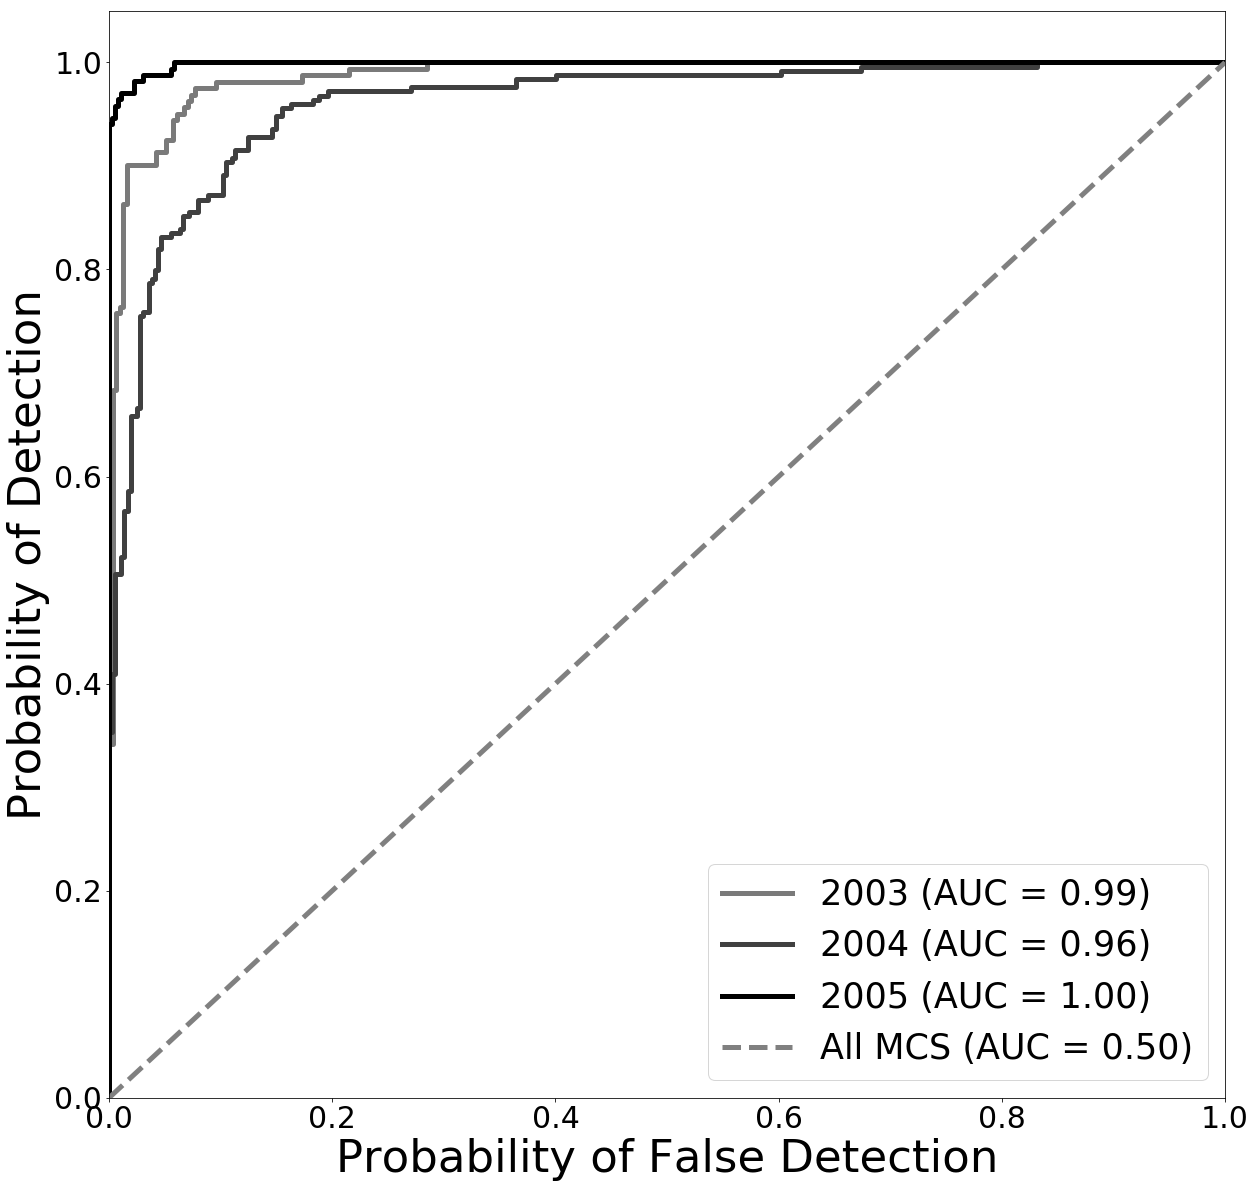

In [13]:
for year in range(2003, 2006):

    X_t = X_test[X_test.index.year==year]
    y_t = X_t.label1.values

    preds = vclf.predict_proba(X_t[feature_list[:-1]].values)[:,1]
        
    fpr, tpr, _ = metrics.roc_curve(y_t, preds)
    
    cval = (year-2000)/5
    
    plt.plot(fpr, tpr, label=str(year) + ' (AUC = %0.2f)' % metrics.auc(fpr, tpr), 
             lw=5, color=plt.cm.Greys(cval), linestyle='-')
    

plt.plot([0, 1], [0, 1], color='grey', lw=5, linestyle='--', label='All MCS (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Probability of False Detection', fontsize=45)
plt.ylabel('Probability of Detection', fontsize=45)
plt.legend(loc="lower right", prop={'size': 35})
plt.show()

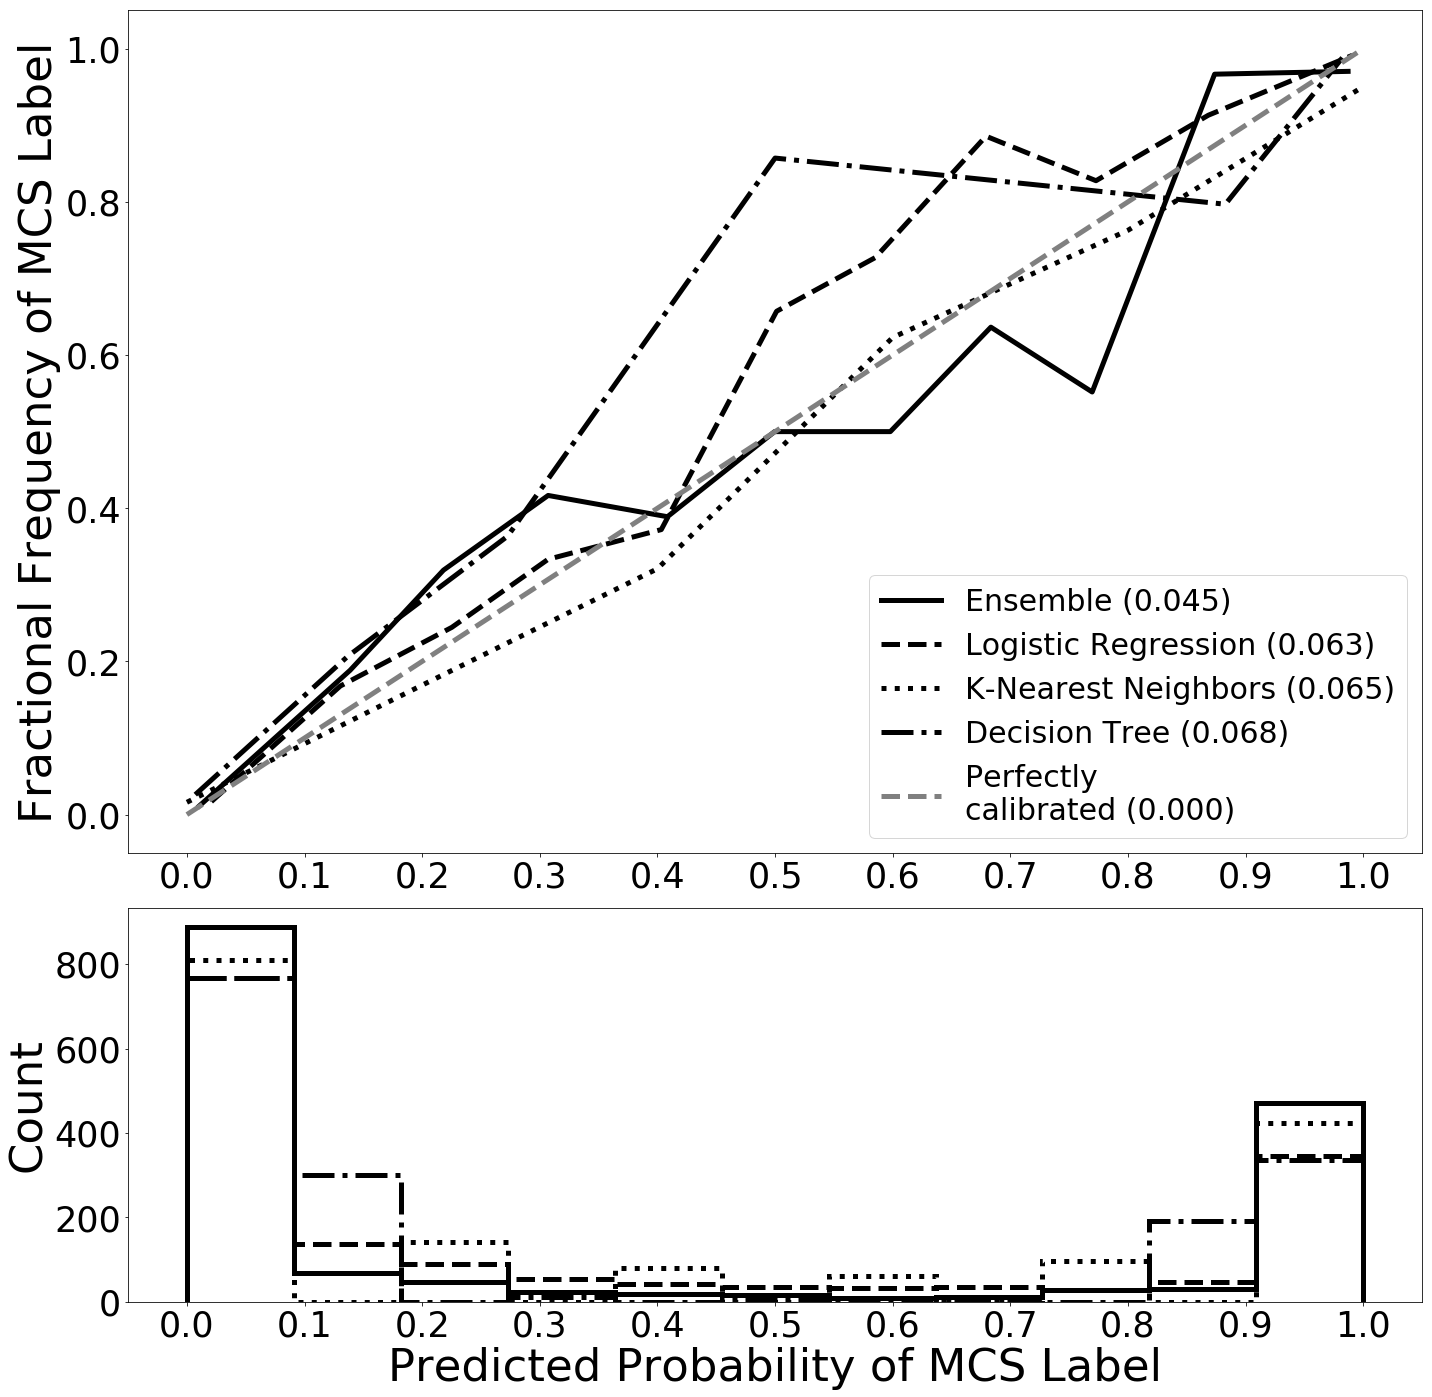

In [14]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve

fig = plt.figure(0, figsize=(20, 20))
plt.rcParams['ytick.labelsize'] = 35
plt.rcParams['xtick.labelsize'] = 35
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

rfc = pickle.load(open("../data/classifiers/best_rfc_binary_020618.pkl", 'rb'))
gbc = pickle.load(open("../data/classifiers/best_gbc_binary_020618.pkl", 'rb'))
vclf = VotingClassifier([('rf', rfc), ('gb', gbc)], voting='soft')


linetype = ['-', '--', ':', '-.']
for l, (clf, name) in enumerate(zip([vclf, lr_clf, kn_clf, dt_clf], ['Ensemble', 'Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree'])):
    
    
    clf.fit(X_train[feature_list[:-1]].values, y_train1)
    y_pred = clf.predict(X_test[feature_list[:-1]].values)

    prob_pos = clf.predict_proba(X_test[feature_list[:-1]].values)[:, 1]

    clf_score = brier_score_loss(y_test1, prob_pos, pos_label=1)

    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test1, prob_pos, n_bins=11)

    ax1.plot(mean_predicted_value, fraction_of_positives, "-", color='k', linestyle=linetype[l],
             label="%s (%1.3f)" % (name, clf_score), lw=5)

    ax2.hist(prob_pos, range=(0, 1), bins=11, color='k', linestyle=linetype[l], label=name,
             histtype="step", lw=5)
    
ax1.plot([0, 1], [0, 1], "--", lw=5, color='grey', label="Perfectly\ncalibrated (0.000)")


ax1.set_ylabel("Fractional Frequency of MCS Label", fontsize=45)
ax1.set_xticks(np.linspace(0, 1, 11))
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right", prop={'size': 30})

ax2.set_xlabel("Predicted Probability of MCS Label", fontsize=45)
ax2.set_xticks(np.linspace(0, 1, 11))
ax2.set_ylabel("Count", fontsize=45)

plt.tight_layout()

2003
2004
2005


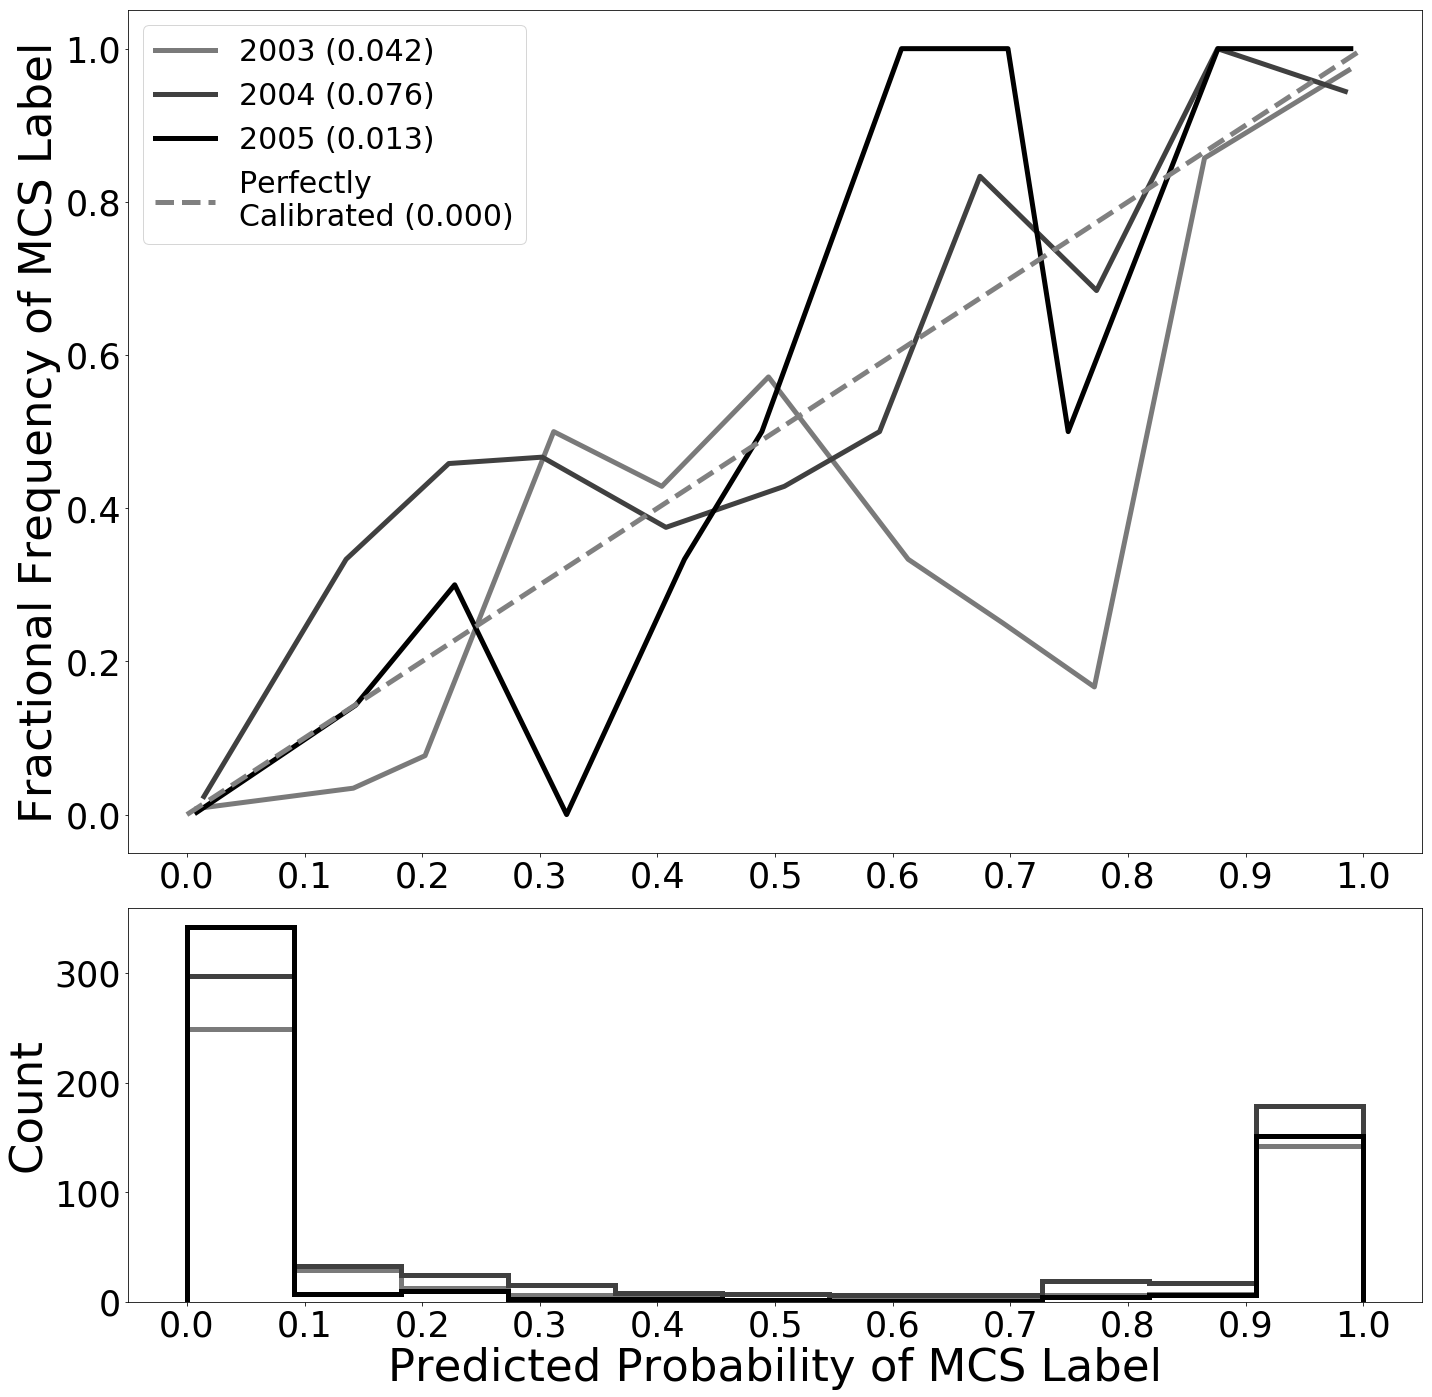

In [15]:
fig = plt.figure(0, figsize=(20, 20))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

for year in range(2003, 2006):

    print(year)
    X_t = X_test[X_test.index.year==year]
    y_t = X_t.label1.values

    prob_pos = vclf.predict_proba(X_t[feature_list[:-1]].values)[:,1]

    clf_score = brier_score_loss(y_t, prob_pos, pos_label=1)

    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_t, prob_pos, n_bins=11)
        
    cval = (year-2000)/5

    ax1.plot(mean_predicted_value, fraction_of_positives, color=plt.cm.Greys(cval), linestyle='-',
             label="%s (%1.3f)" % (str(year), clf_score), lw=5)

    ax2.hist(prob_pos, range=(0, 1), bins=11, color=plt.cm.Greys(cval), linestyle='-', label=name,
             histtype="step", lw=5)
    
ax1.plot([0, 1], [0, 1], "--", lw=5, color='grey', label="Perfectly\nCalibrated (0.000)")


ax1.set_ylabel("Fractional Frequency of MCS Label", fontsize=45)
ax1.set_xticks(np.linspace(0, 1, 11))
ax1.set_ylim([-0.05, 1.05])
ax1.legend(prop={'size': 30})

ax2.set_xlabel("Predicted Probability of MCS Label", fontsize=45)
ax2.set_xticks(np.linspace(0, 1, 11))
ax2.set_ylabel("Count", fontsize=45)

plt.tight_layout()

In [16]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train[feature_list].values, y_train1)

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train[feature_list].values.shape[1]):
    print("%d. (%s) feature %d (%f)" % (f + 1, feature_list[indices[f]], indices[f], importances[indices[f]]))

Feature ranking:
1. (intense_area) feature 3 (0.154929)
2. (area) feature 0 (0.150800)
3. (convection_area) feature 4 (0.125779)
4. (intense_stratiform_ratio) feature 6 (0.100412)
5. (convex_area) feature 1 (0.093537)
6. (intensity_variance) feature 10 (0.084200)
7. (major_axis_length) feature 11 (0.065341)
8. (minor_axis_length) feature 12 (0.063029)
9. (intense_convection_ratio) feature 7 (0.044103)
10. (convection_stratiform_ratio) feature 5 (0.040995)
11. (solidity) feature 13 (0.025004)
12. (max_intensity) feature 9 (0.024382)
13. (mean_intensity) feature 8 (0.018374)
14. (eccentricity) feature 2 (0.009115)


In [17]:
gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
gbc.fit(X_train[feature_list].values, y_train1)

importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train[feature_list].values.shape[1]):
    print("%d. (%s) feature %d (%f)" % (f + 1, feature_list[indices[f]], indices[f], importances[indices[f]]))

Feature ranking:
1. (area) feature 0 (0.160078)
2. (solidity) feature 13 (0.149533)
3. (minor_axis_length) feature 12 (0.071323)
4. (major_axis_length) feature 11 (0.064826)
5. (mean_intensity) feature 8 (0.063080)
6. (convex_area) feature 1 (0.061495)
7. (convection_stratiform_ratio) feature 5 (0.060388)
8. (intense_area) feature 3 (0.060372)
9. (intense_stratiform_ratio) feature 6 (0.053880)
10. (intensity_variance) feature 10 (0.050063)
11. (eccentricity) feature 2 (0.043743)
12. (convection_area) feature 4 (0.038881)
13. (intense_convection_ratio) feature 7 (0.035277)
14. (max_intensity) feature 9 (0.021062)


In [18]:
df_labeled = pd.read_csv("../data/slice_data/labeled_slices_020618.csv")

(20, 45)

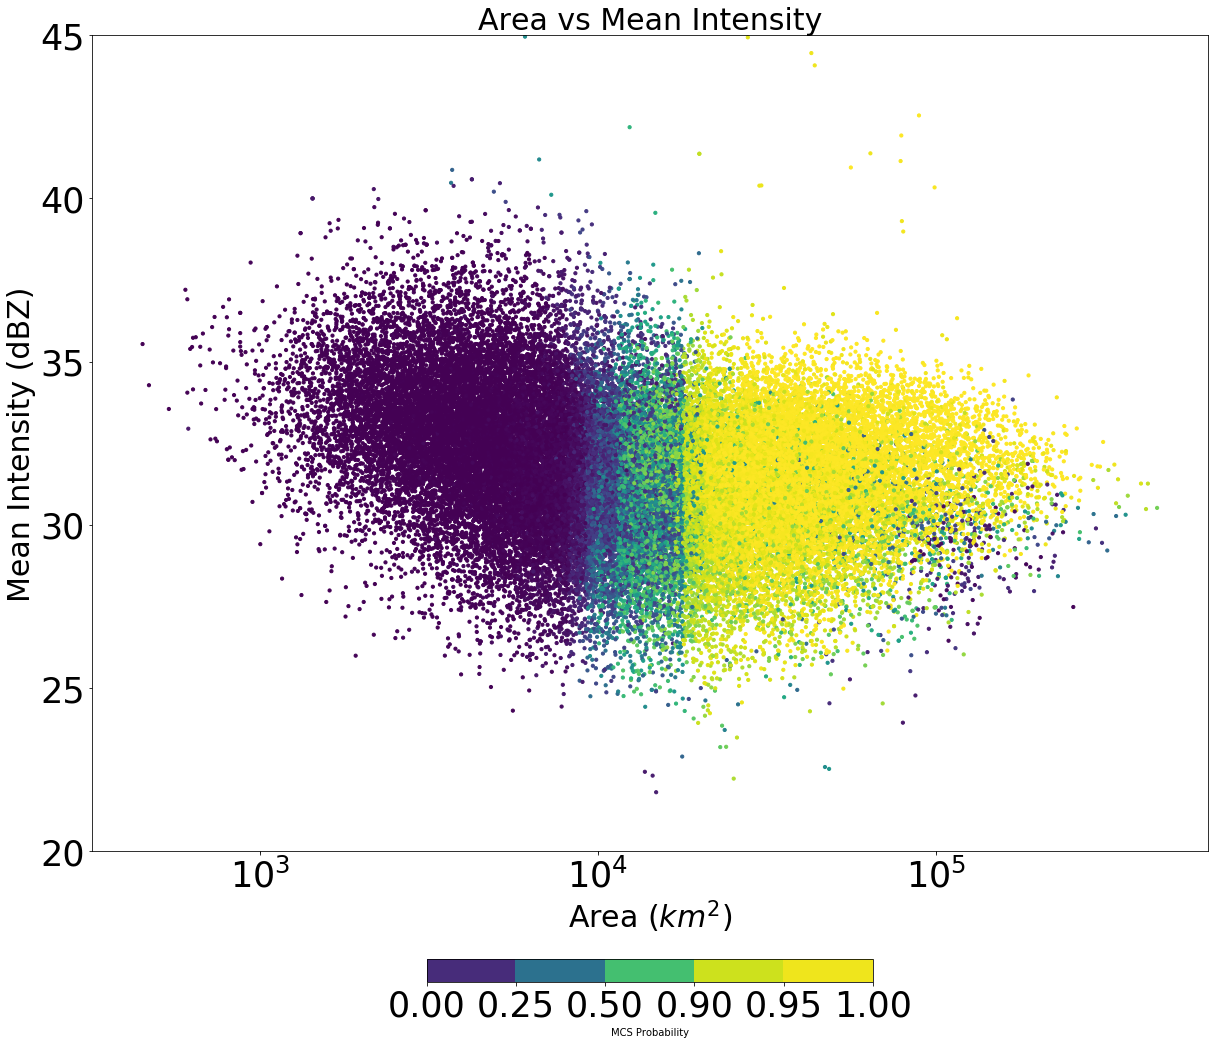

In [19]:
df_ = df_labeled.sample(50000)

sp = plt.scatter(df_.area, df_.mean_intensity, c=df_.mcs_proba, s=10)
plt.xscale('symlog')
plt.title("Area vs Mean Intensity", fontsize=30)
plt.ylabel("Mean Intensity (dBZ)", fontsize=30)
plt.xlabel("Area (" + r'$km^2$' + ")", fontsize=30)
plt.colorbar(sp, shrink=0.4, pad=0.1, orientation='horizontal', boundaries=[0, .25, 0.5, 0.9, 0.95, 1], label='MCS Probability')
plt.ylim(20, 45)